In [17]:
import pdal 
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from interessant import * # Bei Änderungen Kernel neu starten

In [25]:
# Bahnsteig: 29; Gleis hohe Intensität: 11; Weiche B: 16; Unterirdischer Bhf: 20; Gleis weit abseits: 23; Betondeckel: 28; Zug run 14 A (in run24 Achszähler): 6; 
# Viele Gleise: 33; Anfang Weiche: 34, OLA gleiche H: 35; Y: 37
key = list(interessant.keys())[0] 
filename = interessant[key]
print(key, filename)



Einfach 4473900_5335875.copc.laz


In [31]:
pipeline = pdal.Pipeline([pdal.Reader(os.path.join(run24, filename))])
pipeline.execute()
points = pipeline.arrays[0]
df = pd.DataFrame({'Intensity': points['Intensity'],
                   'run': "24"})


In [34]:
df.head()

,Intensity,run
0,12336,24
1,12336,24
2,9766,24
3,9766,24
4,12079,24


In [55]:
df['Intensity'].describe()

count    4.574657e+06
mean     1.807113e+04
std      4.278257e+03
min      0.000000e+00
25%      1.593400e+04
50%      1.876100e+04
75%      2.107400e+04
max      6.527900e+04
Name: Intensity, dtype: float64

<Axes: xlabel='Intensity', ylabel='Count'>

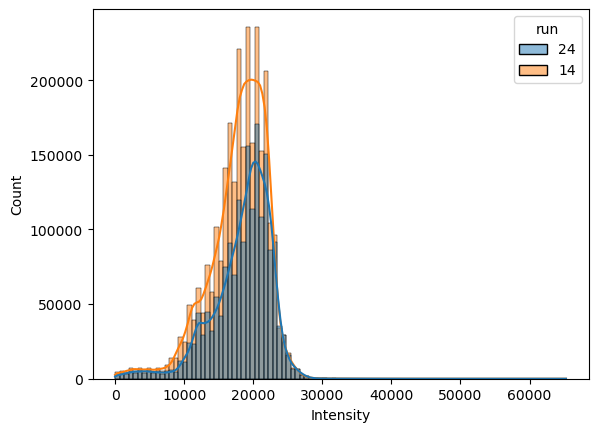

In [36]:
sns.histplot(df, x='Intensity', bins=100, kde=True, hue='run')

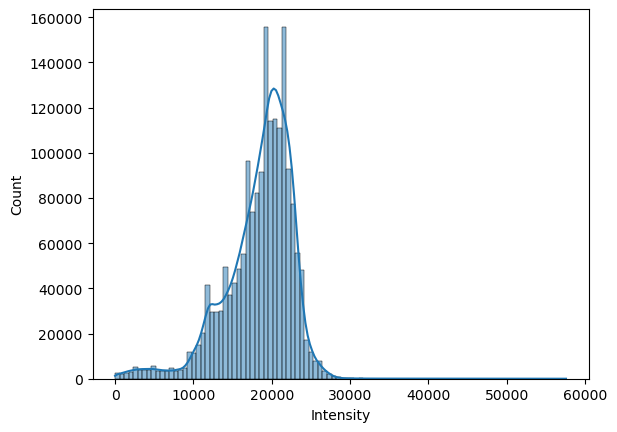

In [50]:
ax = sns.histplot(df[df["run"] == "24"], x='Intensity', bins=100, kde=True) 

In [51]:
ax.set_xlabel("Intensität")
ax.set_ylabel("Anzahl")

fig = ax.get_figure()


In [54]:
fig.savefig("histogramm.png", dpi=300, bbox_inches='tight')